# Introduction

## Understanding IS-academia

See function get_tables at bottom for a single function that returns a pandas dataframe after having scraped the requested data from is-academia. 

All the stuff before that function is explantory text documenting the process of understading the request format to use to the the data we wanted.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

base_url = 'http://isa.epfl.ch/imoniteur_ISAP/%21gedpublicreports.htm?ww_i_reportmodel=133685247'

When making a request through the form, the following request is made:  
http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.filter?ww_b_list=1&ww_i_reportmodel=133685247&ww_c_langue=&ww_i_reportModelXsl=133685270&zz_x_UNITE_ACAD=Informatique&ww_x_UNITE_ACAD=249847&zz_x_PERIODE_ACAD=&ww_x_PERIODE_ACAD=null&zz_x_PERIODE_PEDAGO=&ww_x_PERIODE_PEDAGO=null&zz_x_HIVERETE=&ww_x_HIVERETE=null&dummy=ok

The params are:  
ww_b_list:1   
ww_i_reportmodel:133685247  
ww_c_langue:  
ww_i_reportModelXsl:133685270  
zz_x_UNITE_ACAD:Informatique  
ww_x_UNITE_ACAD:249847  
zz_x_PERIODE_ACAD:  
ww_x_PERIODE_ACAD:null  
zz_x_PERIODE_PEDAGO:  
ww_x_PERIODE_PEDAGO:null  
zz_x_HIVERETE:  
ww_x_HIVERETE:null  
dummy:ok  

Notice we have specified zz_x_UNITE_ACAD:Informatique i.e. computer science

This gives us a list of all the different student lists for computer science.

This request allows us to select a list and display the students:

http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS=71454914&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD=249847&ww_x_PERIODE_ACAD=null&ww_x_PERIODE_PEDAGO=null&ww_x_HIVERETE=null

The params are:  
ww_x_GPS:71454914  
ww_i_reportModel:133685247  
ww_i_reportModelXsl:133685270  
ww_x_UNITE_ACAD:249847  
ww_x_PERIODE_ACAD:null  
ww_x_PERIODE_PEDAGO:null  
ww_x_HIVERETE:null  


For the first question we need to filter on Bachelor, the date and the semester  
Here is the request for bachelor semestre 1 2004-2005:  
http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS=2225262&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD=249847&ww_x_PERIODE_ACAD=null&ww_x_PERIODE_PEDAGO=249108&ww_x_HIVERETE=null

ww_x_GPS:2225262  
ww_i_reportModel:133685247  
ww_i_reportModelXsl:133685270  
ww_x_UNITE_ACAD:249847  
ww_x_PERIODE_ACAD:null  
ww_x_PERIODE_PEDAGO:249108  
ww_x_HIVERETE:null  

And for bachelor semestre 6 2004-2005:  
http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS=2225150&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD=249847&ww_x_PERIODE_ACAD=null&ww_x_PERIODE_PEDAGO=942175&ww_x_HIVERETE=null
ww_x_GPS:2225150  
ww_i_reportModel:133685247  
ww_i_reportModelXsl:133685270  
ww_x_UNITE_ACAD:249847  
ww_x_PERIODE_ACAD:null  
ww_x_PERIODE_PEDAGO:942175  
ww_x_HIVERETE:null  

Remark: we seem to have standard values for ww_x_PERIODE_PEDAGO: 

In [3]:
bachelor_semestre = {1:249108, 6:942175}


Now lets look at how changing the academic period affects the params:  
Bachelor semestre 6 2005-2006:  
http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS=2225237&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD=249847&ww_x_PERIODE_ACAD=null&ww_x_PERIODE_PEDAGO=942175&ww_x_HIVERETE=null

ww_x_GPS:2225237  
ww_i_reportModel:133685247  # Seems to be invariant  
ww_i_reportModelXsl:133685270  
ww_x_UNITE_ACAD:249847  # Section: Computer Science  
ww_x_PERIODE_ACAD:null  
ww_x_PERIODE_PEDAGO:942175  # Semestre  
ww_x_HIVERETE:null  

As expected ww_x_PERIODE_PEDAGO is 942175  
The only value that has changed is ww_x_GPS.

Bachelor Seestre 6 2006-2007:  
http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS=2225324&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD=249847&ww_x_PERIODE_ACAD=null&ww_x_PERIODE_PEDAGO=942175&ww_x_HIVERETE=null   
ww_x_GPS:2225324  
ww_i_reportModel:133685247  
ww_i_reportModelXsl:133685270  
ww_x_UNITE_ACAD:249847  
ww_x_PERIODE_ACAD:null  
ww_x_PERIODE_PEDAGO:942175  
ww_x_HIVERETE:null  

Again only ww_x_GPS has changed. No obvious pattern, expected that it seems to be an upwards trend as we increase the year. Let's check this. 
As this would be sufficient de filter FROM a specific date.

Bachelor 6 2014-2015:  
ww_x_GPS:1378362238  # OK

BAchelor 6 2016-2017:  
ww_x_GPS:1744378039 # OK the trend seems to hold



Let's look at how to differentiate between bachelor and master
Master 1 2015-2016:
http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS=1897033225&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD=249847&ww_x_PERIODE_ACAD=null&ww_x_PERIODE_PEDAGO=2230106&ww_x_HIVERETE=null  
ww_x_GPS:1897033225  
ww_i_reportModel:133685247  
ww_i_reportModelXsl:133685270  
ww_x_UNITE_ACAD:249847  
ww_x_PERIODE_ACAD:null  
ww_x_PERIODE_PEDAGO:2230106  
ww_x_HIVERETE:null  

The value that has changed is ww_x_PERIODE_PEDAGO to 2230106  
We can guess that all master 1 students will have this value, whatever the year. Let's check

Master 1 2013 2014  
ww_x_GPS:1378438423  
ww_i_reportModel:133685247  
ww_i_reportModelXsl:133685270  
ww_x_UNITE_ACAD:249847  
ww_x_PERIODE_ACAD:null  
ww_x_PERIODE_PEDAGO:2230106  
ww_x_HIVERETE:null  

Great. The theory holds.



Let's try filtering on the year from their form.  
Master 1 2016-2017  
http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS=2021044028&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD=249847&ww_x_PERIODE_ACAD=355925344&ww_x_PERIODE_PEDAGO=2230106&ww_x_HIVERETE=null 
ww_x_GPS:2021044028  
ww_i_reportModel:133685247  
ww_i_reportModelXsl:133685270  
ww_x_UNITE_ACAD:249847  
ww_x_PERIODE_ACAD:355925344  
ww_x_PERIODE_PEDAGO:2230106  
ww_x_HIVERETE:null  

Interesting, we have a value for ww_x_PERIODE_ACAD. Let's check this represents the year

Bachelor 6 2016-2017:  
ww_x_GPS:1744378039  
ww_i_reportModel:133685247  
ww_i_reportModelXsl:133685270  
ww_x_UNITE_ACAD:249847  
ww_x_PERIODE_ACAD:355925344  
ww_x_PERIODE_PEDAGO:942175  
ww_x_HIVERETE:null  

Ok great this represents the year. What logic is behind this param ?
Let's go down a year:

BAchelor 6 2015-2016: 
ww_x_GPS:1650772010  
ww_i_reportModel:133685247  
ww_i_reportModelXsl:133685270  
ww_x_UNITE_ACAD:249847  
ww_x_PERIODE_ACAD:213638028  
ww_x_PERIODE_PEDAGO:942175  
ww_x_HIVERETE:null  

Bachelor 6 2014-2015  
ww_x_PERIODE_ACAD:213637922

Ok it looks pretty random, we're just going to get the values for the years we need

In [4]:
# Values for ww_x_PERIODE_ACAD
years = {'2016-2017':355925344,
         '2015-2016':213638028,
         '2014-2015':213637922,
         '2013-2014':213637754,
         '2012-2013':123456101,
         '2011-2012':123455150,
         '2010-2011':39486325,
         '2009-2010':978195,
         '2008-2009':978187,
         '2007-2008':978181 ,     
        }

It also seems there is no obvious where to get ww_x_GPS. Note however that if we request all the lists this param is set to -1. This will do nicely.

In [5]:
def get_data(semestre, year):
    params = {
                'ww_x_GPS':str(-1),  # This gives us all results
                'ww_i_reportModel':133685247,  # Always the same
                'ww_i_reportModelXsl':133685270,  # Always the same
                'ww_x_UNITE_ACAD':249847,  # The section, we also always looking at computer sicence
                'ww_x_PERIODE_ACAD':str(year),  # The school year, ex: 2016-2017
                'ww_x_PERIODE_PEDAGO':str(semestre),  # The semestre, ex Bachelor 1
                'ww_x_HIVERETE':'null'  # Unknown param, always seems to be null
             }
    url = 'http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS={ww_x_GPS}&ww_i_reportModel={ww_i_reportModel}&ww_i_reportModelXsl={ww_i_reportModelXsl}&ww_x_UNITE_ACAD={ww_x_UNITE_ACAD}&ww_x_PERIODE_ACAD={ww_x_PERIODE_ACAD}&ww_x_PERIODE_PEDAGO={ww_x_PERIODE_PEDAGO}&ww_x_HIVERETE={ww_x_HIVERETE}'.format(**params)
    r = requests.get(url)
    return r

In [6]:
# Lets test our function
# assert get_data(bachelor_semestre[1], years['2016-2017']).status_code == 200

In [7]:
# f = open('samplehtml.html','w')
# f.write(get_data(bachelor_semestre[1], years['2016-2017']).text)

## Parsing the data
Let's start having a look at how we can parse this data:
The data we want is basically in an html table.


In [8]:
data = get_data(bachelor_semestre[1], years['2016-2017'])
soup = BeautifulSoup(data.text, 'html.parser')

In [9]:
# soup

In [10]:
len(soup.table)

238

In [11]:
table = soup.table

In [12]:
data_list = []
rows = table.find_all('tr')
for i,row in enumerate(rows):
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    cols = cols[:-1]  # There' s an empty column at the end
    data_list.append(cols)
df = pd.DataFrame(data_list[2:],columns=['Civilité','Nom Prénom','Orientation Bachelor','Orientation Master','Spécialisation','Filière opt.','Mineur','Statut','Type Echange','Ecole Echange','No Sciper'])


In [13]:
df.head()



,Civilité,Nom Prénom,Orientation Bachelor,Orientation Master,Spécialisation,Filière opt.,Mineur,Statut,Type Echange,Ecole Echange,No Sciper
0,Monsieur,Abbey Alexandre,,,,,,Présent,,,235688
1,Monsieur,Ahn Seongho,,,,,,Présent,,,274015
2,Madame,Alemanno Sara,,,,,,Présent,,,268410
3,Monsieur,Althaus Luca,,,,,,Présent,,,271464
4,Monsieur,Assi Karim,,,,,,Présent,,,274518


# Scraping and parsing function


Ok so let's put all of this together in a single function. This function will get the data and return it in a pandas dataframe

In [14]:
def get_table(semestre, year, student_type):
    """
    @param semestre: string representing the semestre number: for example put 1 for semestre 1
    @param year: String representing the academic year: for example '2016-2017'
    @param student type: String either 'bachelor' or 'master'
    @return: pandas dataframe with corresponding data from Is-Academia
    """
    
    years = {'2016-2017':355925344,
         '2015-2016':213638028,
         '2014-2015':213637922,
         '2013-2014':213637754,
         '2012-2013':123456101,
         '2011-2012':123455150,
         '2010-2011':39486325,
         '2009-2010':978195,
         '2008-2009':978187,
         '2007-2008':978181 ,     
        }
    bachelor_semestre = {'1':249108, '2':249114, '3':942155, '4':942163, '5':942120, '5b':2226768, '6':942175, '6b':2226785}
    master_semestre = {'1':2230106, '2':942192, '3':2230128, 'Autumn Project':249127, 'Spring Project':3781783}
    
    if year in years.keys():
        year_code = years[year]
    else:
        raise Exception('Invalid year selected')
        
    if student_type == 'bachelor':
        
        if semestre in ['1', '2', '3', '4', '5', '5b', '6', '6b']:
            semestre_code = bachelor_semestre[semestre]
        else:
            raise Exception('Invalid semestre selected')
            
    elif student_type == 'master':
            
        if semestre in ['1', '2', '3', 'Autumn Project', 'Spring Project']:
            semestre_code = master_semestre[semestre]
        else:
            raise Exception('Invalid semestre selected')
        
    else:
        raise Exception('Invalid student type. Please choose either bachelor or master')
    
    params = {
                'ww_x_GPS':str(-1),  # This gives us all results
                'ww_i_reportModel':133685247,  # Always the same
                'ww_i_reportModelXsl':133685270,  # Always the same
                'ww_x_UNITE_ACAD':249847,  # The section, we also always looking at computer sicence
                'ww_x_PERIODE_ACAD':str(year_code),  # The school year, ex: 2016-2017
                'ww_x_PERIODE_PEDAGO':str(semestre_code),  # The semestre, ex Bachelor 1
                'ww_x_HIVERETE':'null'  # Unknown param, always seems to be null
             }
    url = 'http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS={ww_x_GPS}&ww_i_reportModel={ww_i_reportModel}&ww_i_reportModelXsl={ww_i_reportModelXsl}&ww_x_UNITE_ACAD={ww_x_UNITE_ACAD}&ww_x_PERIODE_ACAD={ww_x_PERIODE_ACAD}&ww_x_PERIODE_PEDAGO={ww_x_PERIODE_PEDAGO}&ww_x_HIVERETE={ww_x_HIVERETE}'.format(**params)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    table = soup.table
    data_list = []
    rows = table.find_all('tr')
    for i,row in enumerate(rows):
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        cols = cols[:-1]  # There' s an empty column at the end
        data_list.append(cols)
    columns=['Civilité','Nom Prénom','Orientation Bachelor','Orientation Master','Spécialisation','Filière opt.','Mineur','Statut','Type Echange','Ecole Echange','No Sciper']
    df = pd.DataFrame(data_list[2:],columns=columns)
    return df


In [15]:
# test
get_table('1','2016-2017', 'master')

,Civilité,Nom Prénom,Orientation Bachelor,Orientation Master,Spécialisation,Filière opt.,Mineur,Statut,Type Echange,Ecole Echange,No Sciper
0,Monsieur,Adams Marc Alain,,,,,,Présent,,,271331
1,Monsieur,Adamsons Valdis,,,,,,Présent,,,273101
2,Monsieur,Agapiou Stylianos,,,,,,Présent,,,267543
3,Monsieur,Aiulfi Loris Sandro,,,,,,Présent,,,202293
4,Monsieur,Alfonso Peterssen Alfonso,,,Foundations of Software,,,Présent,,,228219
5,Monsieur,Angerand Grégoire Georges Jacques,,,,,,Présent,,,212464
6,Monsieur,Anongba Varela Dario Abougnan,,,Software Systems,,,Présent,,,226371
7,Monsieur,Aquil Mohammad Amimul Ihsan,,,Foundations of Software,,,Présent,,,273107
8,Monsieur,Bao Junze,,,,,,Présent,,,266983
9,Monsieur,Barbera Antonino,,,,,,Présent,,,273118


# Storing results locally

To avoid doing multiple IS-Academia requests, let's just save all the records we need in a local folder.

This function should remain quoted, as there is no need to import all of the files twice, causing a flood on IS-Academia.

In [16]:
"""directory = os.path.realpath ('__file__') + '\\IS-Academia_Data\\'
years = ['2016-2017', '2015-2016', '2014-2015', '2013-2014', '2012-2013', '2011-2012', '2010-2011', '2009-2010', '2008-2009', '2007-2008']
bachelor_semesters = ['1', '2', '3', '4', '5', '5b', '6', '6b']
master_semesters = ['1', '2', '3', 'Autumn Project', 'Spring Project']

for year in years:
    for semester in bachelor_semesters:
        writer_bachelor = pd.ExcelWriter('bachelor_' + year + '_' + semester + '.xlsx', engine='xlsxwriter')
        get_table (semester, year, 'bachelor').to_excel (writer_bachelor, sheet_name = 'Main Sheet')
        writer_bachelor.save ()
        writer_bachelor.close ()
    for semester in master_semesters:
        writer_master = pd.ExcelWriter('master_' + year + '_' + semester + '.xlsx', engine='xlsxwriter')
        get_table (semester, year, 'master').to_excel (writer_master, sheet_name = 'Main Sheet')
        writer_master.save ()
        writer_master.close ()"""

"directory = os.path.realpath ('__file__') + '\\IS-Academia_Data\\'\nyears = ['2016-2017', '2015-2016', '2014-2015', '2013-2014', '2012-2013', '2011-2012', '2010-2011', '2009-2010', '2008-2009', '2007-2008']\nbachelor_semesters = ['1', '2', '3', '4', '5', '5b', '6', '6b']\nmaster_semesters = ['1', '2', '3', 'Autumn Project', 'Spring Project']\n\nfor year in years:\n    for semester in bachelor_semesters:\n        writer_bachelor = pd.ExcelWriter('bachelor_' + year + '_' + semester + '.xlsx', engine='xlsxwriter')\n        get_table (semester, year, 'bachelor').to_excel (writer_bachelor, sheet_name = 'Main Sheet')\n        writer_bachelor.save ()\n        writer_bachelor.close ()\n    for semester in master_semesters:\n        writer_master = pd.ExcelWriter('master_' + year + '_' + semester + '.xlsx', engine='xlsxwriter')\n        get_table (semester, year, 'master').to_excel (writer_master, sheet_name = 'Main Sheet')\n        writer_master.save ()\n        writer_master.close ()"

Now that we have all the necessary excel files, time to write a function to load them from the local hard drive.

In [17]:
def get_local_table (semester, year, student_type):
    return pd.read_excel ('IS-Academia_Data/' + student_type + '_' + year + '_' + semester + '.xlsx').fillna ('')

In [18]:
get_local_table ('1', '2013-2014', 'bachelor')

,Civilité,Nom Prénom,Orientation Bachelor,Orientation Master,Spécialisation,Filière opt.,Mineur,Statut,Type Echange,Ecole Echange,No Sciper
0,Monsieur,Adler Yves-Fredricq Samuel,,,,,,Présent,,,238673
1,Monsieur,Alfonso Peterssen Alfonso,,,,,,Présent,,,228219
2,Monsieur,Allemand Adrien,,,,,,Présent,,,234698
3,Madame,Ammann Gaëlle,,,,,,Présent,,,228116
4,Monsieur,Amrani Kamil,,,,,,Présent,,,226305
5,Monsieur,Antelo Blanco Lucas,,,,,,Présent,,,235644
6,Monsieur,Antunes Nelson Tiago,,,,,,Présent,,,224198
7,Madame,Arreguit O'Neill Stephanie Lauren,,,,,,Présent,,,237964
8,Monsieur,Baeriswyl Julien,,,,,,Présent,,,225455
9,Monsieur,Ballerini Marco Roberto Julian,,,,,,Présent,,,236818


## Exercice 1 : How much time does it take to complete Bachelor degree ?

As we want all the students that have gone through all the semesters (6), and as we want this since 2007, we need a small loop to merge data frames about each semester 1 to 6.

Basically, all we have to do is first load all the semesters students Sciper number from 2007-2008 to 20xx-20xx (we can assume that a bachelor degree cannot be completed in under 3 years, hence, we don't need the 2015 records for semester 1 for example), create a column containing the number 1 (attempts) to sum later the count of semesters, then concatenate all of it for each semester, sum the semester attempts, and inner merge all semesters to get rid of those who didn't attend semester 6. The last thing we'll have to do is to sum the 'Attempts' columns, and groupby "civilité" to compute the mean for each gender.

What we are basically doing, is that we'll count the number of semester attended by each student, and do a mean.

So first, let us build a function that computes all students that attended a given semester in a given degree type (bachelor or master)

In [19]:
def computeSemesterStudentsBetween (semester, degree_type, fromYear2k, toYear2k, keepColumns):

    #We'll build a frame list to concatenate afterwards
    frame_list = []
    
    #The year interval we want
    interval = toYear2k - fromYear2k + 1
    
    #The name of our attempt, which is basically 'Attempts ' plus the semester number
    attempts = 'Attempts ' + semester
    
    #Last, which columns to keep, in order to avoid unnecessary operations
    keep = keepColumns + [attempts]

    for i in range (interval):

        #Take the lower bound year, in order to grab the right information on IS-Academia
        #Basically we are just building a serie of '20xx-20yy' for the scraping, where xx - yy = 1
        lowerBoundYear = i + fromYear2k
        upperBoundYear = lowerBoundYear + 1

        stringLowerBoundYear = '20'
        stringUpperBoundYear = '20'

        if lowerBoundYear < 10:
            stringLowerBoundYear += '0'

        if upperBoundYear < 10:
            stringUpperBoundYear += '0'

        stringLowerBoundYear += str (lowerBoundYear)
        stringUpperBoundYear += str (upperBoundYear)

        #So now 'year' is something like '2016-2017'
        year = stringLowerBoundYear + '-' + stringUpperBoundYear

        #Grab this year's information using the function we built earlier
        t = get_local_table (semester, year, degree_type)
        
        #Adding the attempt column, to be summed after the groupby
        t[attempts] = 1

        #Adding the current data frame to the list to concatenate
        frame_list.append (t[['No Sciper'] + keep])
        
    #Finally, we just concatenate all the gathered data frames into one big
    output = pd.concat (frame_list)
    
    #We compute the necessary aggregation for the groupby
    aggre = {'No Sciper': 'first', attempts: sum}
    
    for k in keepColumns:
        aggre [k] = 'first'
    
    #And we conclude
    output = output.groupby ('No Sciper').agg (aggre)
        
    return output

Now, let us try out this splendid function.

In [20]:
semester_1 = computeSemesterStudentsBetween ('1', 'bachelor', 7, 13, ['Civilité'])
semester_1

,Attempts 1,Civilité,No Sciper
No Sciper,,,
147008,1,Monsieur,147008
161212,1,Monsieur,161212
169569,1,Monsieur,169569
169731,1,Monsieur,169731
169795,1,Monsieur,169795
170509,1,Monsieur,170509
171195,1,Monsieur,171195
171568,1,Monsieur,171568
171619,1,Monsieur,171619


Alright ! So now we seem to have a good input for semester 1, with 824 students for the Computer Science bachelor degree. Let's now compute the other semesters.

In [21]:
all_semesters = semester_1

for i in ['2', '3', '4', '5', '6']:
    all_semesters = pd.merge (all_semesters, pd.DataFrame (computeSemesterStudentsBetween (i, 'bachelor', 7, 16, ['Civilité']) ['Attempts ' + i]), left_index=True, right_index=True, how='inner')
    
all_semesters.head ()

,Attempts 1,Civilité,No Sciper,Attempts 2,Attempts 3,Attempts 4,Attempts 5,Attempts 6
No Sciper,,,,,,,,
147008,1,Monsieur,147008,1,1,1,1,1
169569,1,Monsieur,169569,1,1,1,1,1
169731,1,Monsieur,169731,1,2,2,1,1
169795,1,Monsieur,169795,1,1,1,3,2
171195,1,Monsieur,171195,1,1,1,1,1


This looks promising. Let's now have a look on the global mean by student.

In [22]:
total_attempts = all_semesters [['Civilité']]
a = [0 for i in range (total_attempts.shape [0])]

for i in range(6):
    a += all_semesters ['Attempts ' + str(i + 1)]
    
total_attempts ['Total Attempts'] = a
total_attempts.head ()

/Users/mariedrieghe/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Civilité,Total Attempts
No Sciper,,
147008,Monsieur,6
169569,Monsieur,6
169731,Monsieur,8
169795,Monsieur,9
171195,Monsieur,6


Just a small check, to see if no student graduated in less than 6 semesters

In [23]:
total_attempts ['Total Attempts'].min ()

6

Now let's compute the mean months duration for all students

In [24]:
total_attempts ['Total Attempts'].mean () * 5

35.733333333333334

And finally, compute the mean by gender :

In [25]:
total_attempts.groupby ('Civilité') ['Total Attempts'].mean () * 5

Civilité
Madame      34.107143
Monsieur    35.864553
Name: Total Attempts, dtype: float64

We can conclude that women are more likely to graduate faster than men.

## Statistical testing

We would like to see whether these results are statistically significant.

In [26]:
import scipy.stats as stats
import numpy as np
import pylab as pl

We check the normality of the distribution to decide on the statistical test. Both the graph and the ks test tell us the distribution is not normal.

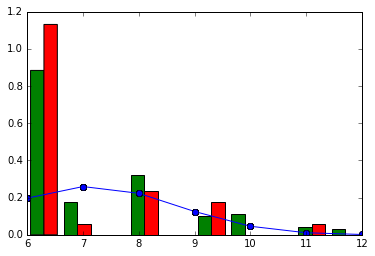

In [27]:
male_data = total_attempts[total_attempts['Civilité']=='Monsieur']['Total Attempts']
female_data = total_attempts[total_attempts['Civilité']=='Madame']['Total Attempts']

data = total_attempts['Total Attempts']
data = data.sort_values()

fit = stats.norm.pdf(data, np.mean(data), np.std(data))  #this is a fitting indeed

pl.plot(data,fit,'-o')
pl.hist([male_data, female_data],normed=True)      #use this to draw histogram of your data
pl.show()

In [28]:
print(stats.kstest(male_data, 'norm'))
print(stats.kstest(female_data, 'norm'))

KstestResult(statistic=0.9999999990134123, pvalue=0.0)
KstestResult(statistic=0.9999999990134123, pvalue=0.0)


We used the non-parametric K-S test to compare the female and male distributions. Because of the high p-value we can decide that both distributions are similar.

In [29]:
stats.ks_2samp(female_data, male_data)

Ks_2sampResult(statistic=0.14831206257719232, pvalue=0.58375445334220755)

## Exercise 2 - What about Master students ?

This time, we'll look forward to see how it goes for master students. As some missing records from IS-Academia may blur the results, we should first check what records to drop from the data, in order to clean the whole thing up.

But to do this, we'll just compute, for each student, the semesters they attended, and how many times. We'll also keep track of their Mineur or Specialisation to filter afterward the unreliable data.

In [30]:
all_semesters_master = computeSemesterStudentsBetween ('1', 'master', 7, 16, ['Civilité', 'Spécialisation', 'Mineur'])

for i in ['2', '3', 'Autumn Project', 'Spring Project']:
    all_semesters_master = pd.merge (all_semesters_master, pd.DataFrame (computeSemesterStudentsBetween (i, 'master', 7, 16, ['Civilité', 'Spécialisation', 'Mineur']) ['Attempts ' + i]), left_index=True, right_index=True, how='outer')
    
all_semesters_master[['Civilité','Attempts 1','Attempts 2','Attempts 3', 'Attempts Autumn Project', 'Attempts Spring Project', 'Mineur', 'Spécialisation']].head ()

,Civilité,Attempts 1,Attempts 2,Attempts 3,Attempts Autumn Project,Attempts Spring Project,Mineur,Spécialisation
No Sciper,,,,,,,,
128911,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
129093,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
129326,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
138088,Monsieur,1.0,NaN,NaN,NaN,NaN,,
145546,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [31]:
all_semesters_master.shape

(977, 9)

In [32]:
all_semesters_master.describe ()

/Users/mariedrieghe/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Attempts 1,No Sciper,Attempts 2,Attempts 3,Attempts Autumn Project,Attempts Spring Project
count,901.000000,901.000000,789.000000,635.000000,86.0,42.0
mean,1.052164,208485.027747,1.346008,1.111811,1.0,1.0
std,0.241634,30123.678952,0.516897,0.325231,0.0,0.0
min,1.000000,138088.000000,1.000000,1.000000,1.0,1.0
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,3.000000,273563.000000,3.000000,3.000000,1.0,1.0


Let's drop all students where:  
- No information is provided for Civilité
- They haven't completed either semester 1 or 2

This gives us all students that have completed semesters 1 and 2 (in theory, unless they dropped out after semester 2), and how many times they did each semester (a semester here includes projects and internship).

In [33]:
all_semesters_master = all_semesters_master.dropna(subset=['Civilité', 'Attempts 1', 'Attempts 2'])
all_semesters_master.head()

,Spécialisation,Mineur,Attempts 1,Civilité,No Sciper,Attempts 2,Attempts 3,Attempts Autumn Project,Attempts Spring Project
No Sciper,,,,,,,,,
146330,,,1.0,Monsieur,146330.0,1.0,1.0,NaN,NaN
146742,"Signals, Images and Interfaces",,1.0,Monsieur,146742.0,2.0,2.0,1.0,1.0
146929,,,1.0,Monsieur,146929.0,1.0,NaN,NaN,NaN
147008,"Signals, Images and Interfaces",,1.0,Monsieur,147008.0,2.0,1.0,NaN,NaN
152232,,,1.0,Monsieur,152232.0,1.0,1.0,NaN,NaN


We need to count the number of semesters each student has done, knowing that they may or may not have done a third semester, and they may have done either a master's project or a internship (stage) (in which case they are registered under a semester with status = stage).
We simply add up all the rows, replacing nan with 0 to get the total number of semestres per student.

In [34]:
total_attempts_masters = all_semesters_master [['Civilité','Spécialisation']]
a = [0 for i in range (total_attempts_masters.shape [0])]

for i in range(3):
    # Some students don't do a semester 3 so we fill in the nan with 0
    a += all_semesters_master ['Attempts ' + str(i + 1)].fillna(0)
    
# Don't forget to add on the semesters for a master's project
a += all_semesters_master ['Attempts Autumn Project'].fillna(0)
a += all_semesters_master ['Attempts Spring Project'].fillna(0)
    
total_attempts_masters ['Total Attempts'] = a
total_attempts_masters.head()

/Users/mariedrieghe/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Civilité,Spécialisation,Total Attempts
No Sciper,,,
146330,Monsieur,,3.0
146742,Monsieur,"Signals, Images and Interfaces",7.0
146929,Monsieur,,2.0
147008,Monsieur,"Signals, Images and Interfaces",4.0
152232,Monsieur,,3.0


Check all students have their 3 semestres (i.e. 90 credits)

In [35]:
total_attempts_masters ['Total Attempts'].min ()

2.0

Some people have only done 2 semesters. Every student should at least do 3 to finish their degree. We can leave them out, they might be exchange students.
We will filter by total attempts > 3

In [36]:
total_attempts_masters = total_attempts_masters[total_attempts_masters['Total Attempts'] >= 3]

Let's calculate the mean study duration in months for master's students (supposing a semestre is 5 months)

In [37]:
total_attempts_masters ['Total Attempts'].mean () * 5

18.3125

Now let's group by gender

In [38]:
total_attempts_masters.groupby ('Civilité') ['Total Attempts'].mean () * 5

Civilité
Madame      18.255814
Monsieur    18.321300
Name: Total Attempts, dtype: float64

As with the bachelors, we can see that in general women tend to complete their studies faster. But the difference is very small

## Statistical tests

We check the normality of the distribution to decide on the statistical test. Both the graph and the ks test tell us the distribution is not normal.

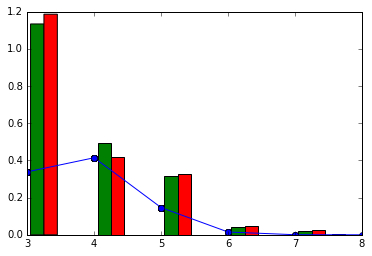

In [42]:
male_data_masters = total_attempts_masters[total_attempts_masters['Civilité']=='Monsieur']['Total Attempts']
female_data_masters = total_attempts_masters[total_attempts_masters['Civilité']=='Madame']['Total Attempts']

data_masters = total_attempts_masters['Total Attempts']
data_masters = data_masters.sort_values()

fit = stats.norm.pdf(data_masters, np.mean(data_masters), np.std(data_masters))  #this is a fitting indeed

pl.plot(data_masters,fit,'-o')
pl.hist([male_data_masters, female_data_masters],normed=True)      #use this to draw histogram of your data
pl.show()

In [43]:
print(stats.kstest(male_data_masters, 'norm'))
print(stats.kstest(female_data_masters, 'norm'))

KstestResult(statistic=0.9986501019683699, pvalue=0.0)
KstestResult(statistic=0.9986501019683699, pvalue=0.0)


We used the non-parametric K-S test to compare the female and male distributions. Because of the high p-value we can decide that both distributions are similar.

In [44]:
stats.ks_2samp(female_data_masters, male_data_masters)

Ks_2sampResult(statistic=0.026236252203845289, pvalue=0.99999999921260818)

## Results by specialisation

First we extract only the students that have a specialisation

In [46]:
import numpy as np
specialisations = total_attempts_masters
specialisations['Spécialisation'].replace('', np.nan, inplace=True)
specialisations = specialisations.dropna(subset=['Spécialisation'])
specialisations.head()

,Civilité,Spécialisation,Total Attempts
No Sciper,,,
146742,Monsieur,"Signals, Images and Interfaces",7.0
147008,Monsieur,"Signals, Images and Interfaces",4.0
165819,Monsieur,Foundations of Software,4.0
166263,Monsieur,Foundations of Software,3.0
169569,Monsieur,"Signals, Images and Interfaces",5.0


Now we apply the same process as before to count the total number of semesters each person from each specialisation does on average.

In [47]:
specialisations.groupby ('Spécialisation') ['Total Attempts'].mean () * 5

Spécialisation
Biocomputing                      15.000000
Computer Engineering - SP         17.500000
Data Analytics                    15.000000
Foundations of Software           19.333333
Information Security - SP         25.000000
Internet computing                18.958333
Service science                   15.000000
Signals, Images and Interfaces    21.071429
Software Systems                  20.833333
Name: Total Attempts, dtype: float64

In [48]:
specialisations.groupby ('Spécialisation') ['Total Attempts'].count()

Spécialisation
Biocomputing                       1
Computer Engineering - SP          4
Data Analytics                     1
Foundations of Software           15
Information Security - SP          1
Internet computing                24
Service science                    2
Signals, Images and Interfaces    14
Software Systems                   6
Name: Total Attempts, dtype: int64

As we will see during the tests, some of these specialisation have too few students to be able to draw any proper conclusions.

In [49]:
possible_specialisations = ['Biocomputing','Computer Engineering - SP','Data Analytics','Foundations of Software','Information Security - SP','Internet computing',
                   'Service science','Signals, Images and Interfaces','Software Systems']
# compare each specialisation distribution to the general distribution
for spec in possible_specialisations:
    specialisation_data = specialisations[specialisations['Spécialisation']==spec]['Total Attempts']
    print(spec)
    print(stats.ks_2samp(specialisation_data, specialisations['Total Attempts']))
    print('\n')

Biocomputing
Ks_2sampResult(statistic=0.60294117647058831, pvalue=0.64786761135230109)


Computer Engineering - SP
Ks_2sampResult(statistic=0.23529411764705888, pvalue=0.96465628442325202)


Data Analytics
Ks_2sampResult(statistic=0.60294117647058831, pvalue=0.64786761135230109)


Foundations of Software
Ks_2sampResult(statistic=0.031372549019607843, pvalue=0.99999999999999978)


Information Security - SP
Ks_2sampResult(statistic=0.76470588235294112, pvalue=0.34543349318721761)


Internet computing
Ks_2sampResult(statistic=0.068627450980392246, pvalue=0.99999142793396478)


Service science
Ks_2sampResult(statistic=0.60294117647058831, pvalue=0.31494118090800594)


Signals, Images and Interfaces
Ks_2sampResult(statistic=0.12184873949579822, pvalue=0.99180037508597663)


Software Systems
Ks_2sampResult(statistic=0.23039215686274508, pvalue=0.89030265712903145)




None of these results seem to be statistically significant